# Bibliotecas

In [140]:
import seaborn as sns
import pandas  as pd
import numpy   as np
import plotly.graph_objects as go
import plotly.express as px
import math

from datetime import datetime

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing,cluster



# Base de dados

In [141]:
df = pd.read_csv('../data/Sample - Superstore.csv' , encoding='latin1')


In [142]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [143]:
# Convertendo as colunas 'Order Date' e 'Ship Date' em formato de data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [144]:
# Calculando o tempo de entrega 'Delivery Time'
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Gráficos

##### Tendência das vendas

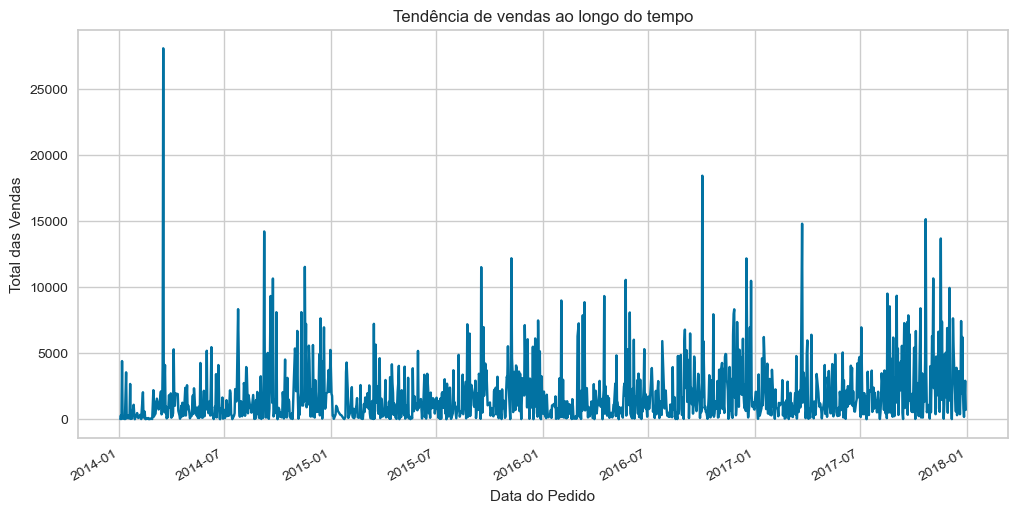

In [145]:
# Agrupado pela data da venda e vendas acumuladas
tend_vendas = df.groupby('Order Date')['Sales'].sum()

# Gráfico de Tendência das vendas
plt.figure(figsize=(12, 6))
tend_vendas.plot()
plt.title('Tendência de vendas ao longo do tempo')
plt.xlabel('Data do Pedido')
plt.ylabel('Total das Vendas')
plt.grid(True)
plt.show()


##### Tendência de lucro

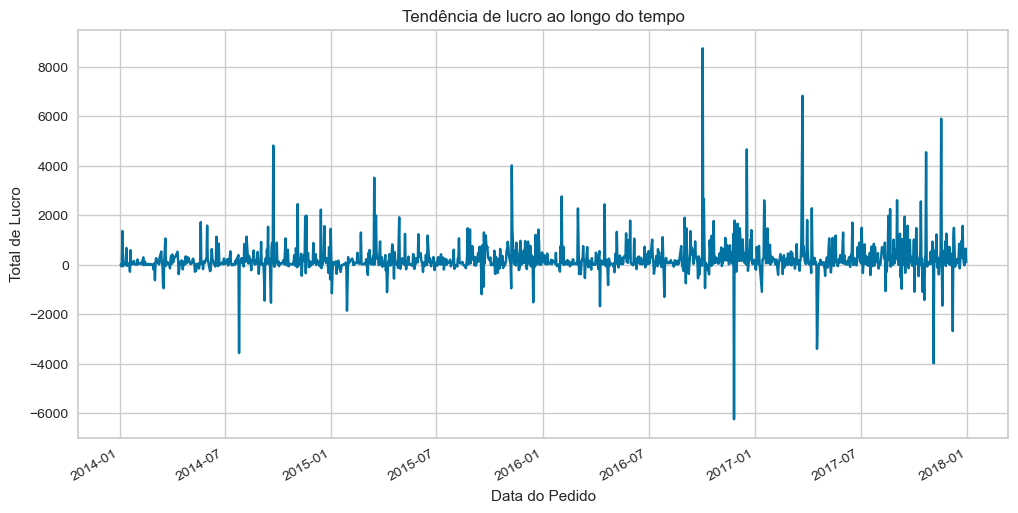

In [ ]:
# Agrupado pela data da venda e lucros acumulados
tend_lucro = df.groupby('Order Date')['Profit'].sum()

# Gráfico de Tendência dos lucros
plt.figure(figsize=(12, 6))
tend_lucro.plot()
plt.title('Tendência de lucro ao longo do tempo')
plt.xlabel('Data do Pedido')
plt.ylabel('Total de Lucro')
plt.grid(True)
plt.show()


##### Acumulado de vendas mensal

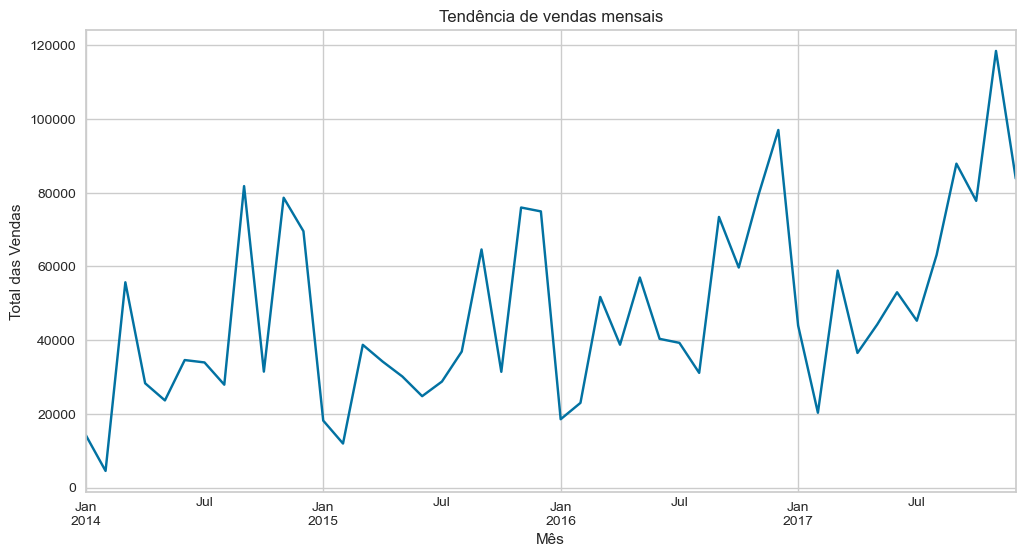

In [ ]:
# Exibir dados de frequência mensal e vendas agregadas
vendas_mensais = df.resample('ME', on='Order Date')['Sales'].sum()

# Gráfico das vendas mensais
plt.figure(figsize=(12, 6))
vendas_mensais.plot()
plt.title('Tendência de vendas mensais')
plt.xlabel('Mês')
plt.ylabel('Total das Vendas')
plt.grid(True)
plt.show()

##### Acumulado de vendas semanal

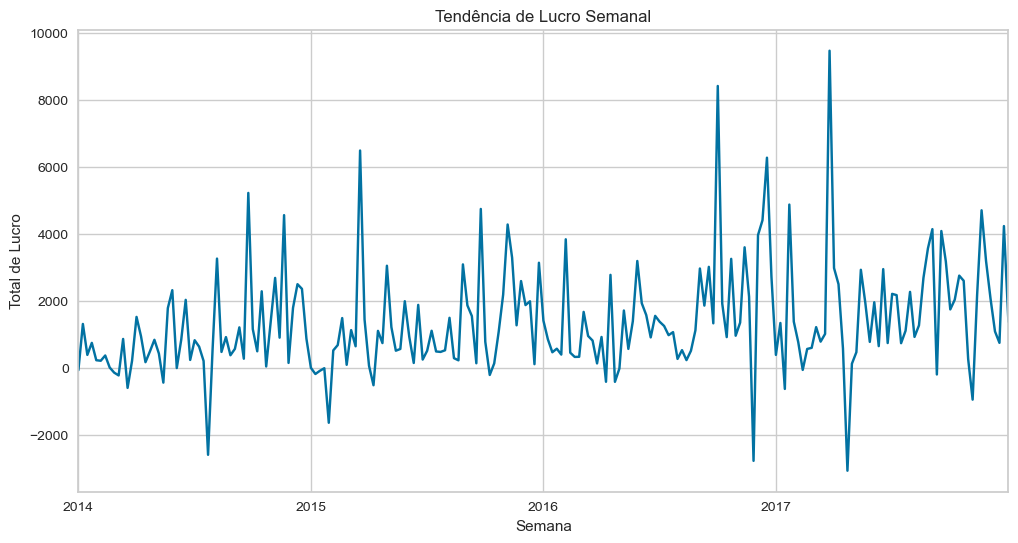

In [ ]:
# Exibir dados de frequência mensal e lucro agregado
lucro_semanal = df.resample('W', on='Order Date')['Profit'].sum()

# Gráfico dos lucros semanais
plt.figure(figsize=(12, 6))
lucro_semanal.plot()
plt.title('Tendência de Lucro Semanal')
plt.xlabel('Semana')
plt.ylabel('Total de Lucro')
plt.grid(True)
plt.show()

##### Principais clientes por vendas

In [149]:
# Agrupe por ID do cliente e calcule o total de vendas e lucro
lucro_vendas_cliente = df.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

In [150]:
# Classificação dos clientes pelo total de vendas
top_clientes = lucro_vendas_cliente.sort_values(by='Sales', ascending=False).head(10)

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_3416\3359094339.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




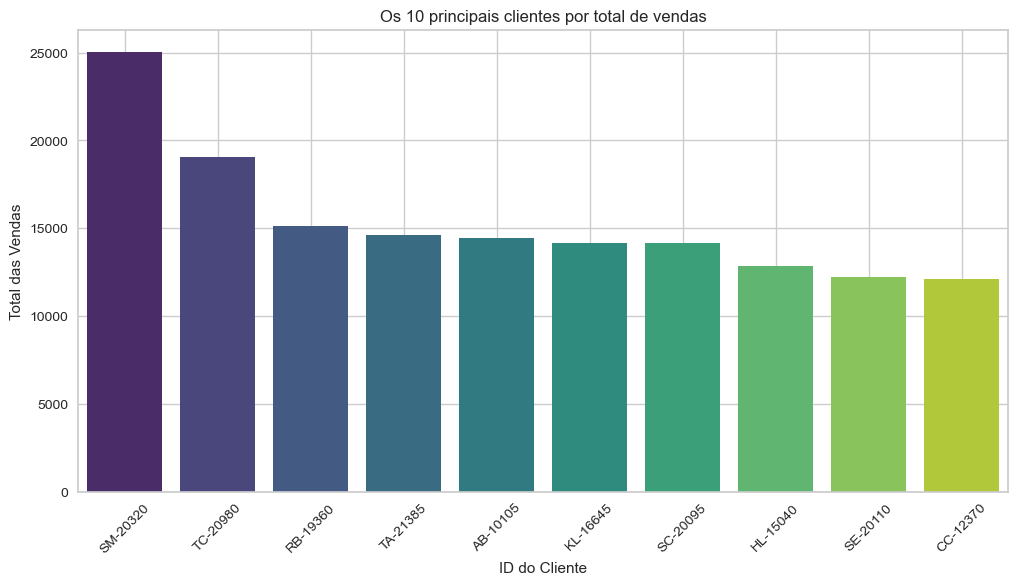

In [151]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='Sales', data=top_clientes, palette='viridis', hue=None)
plt.title('Os 10 principais clientes por total de vendas')
plt.xlabel('ID do Cliente')
plt.ylabel('Total das Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### Análise de comportamento do cliente

In [152]:
# Agrupando por ID do cliente e data do pedido e contando o número de pedidos
freq_compra = df.groupby('Customer ID').size().reset_index(name='Order Count')

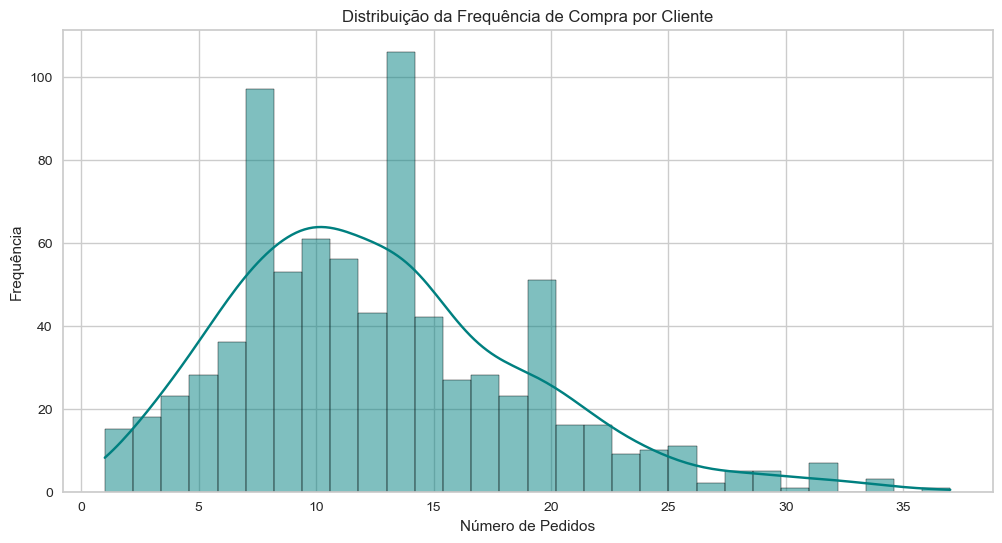

In [153]:
# Gráfico da frequência de compra por cliente
plt.figure(figsize=(12, 6))
sns.histplot(freq_compra['Order Count'], bins=30, kde=True, color='teal')
plt.title('Distribuição da Frequência de Compra por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

##### Desempenho da categoria do produto

In [154]:
# Agrupar por categoria e agregar vendas e lucros
desempenho_categoria = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_3416\578838379.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




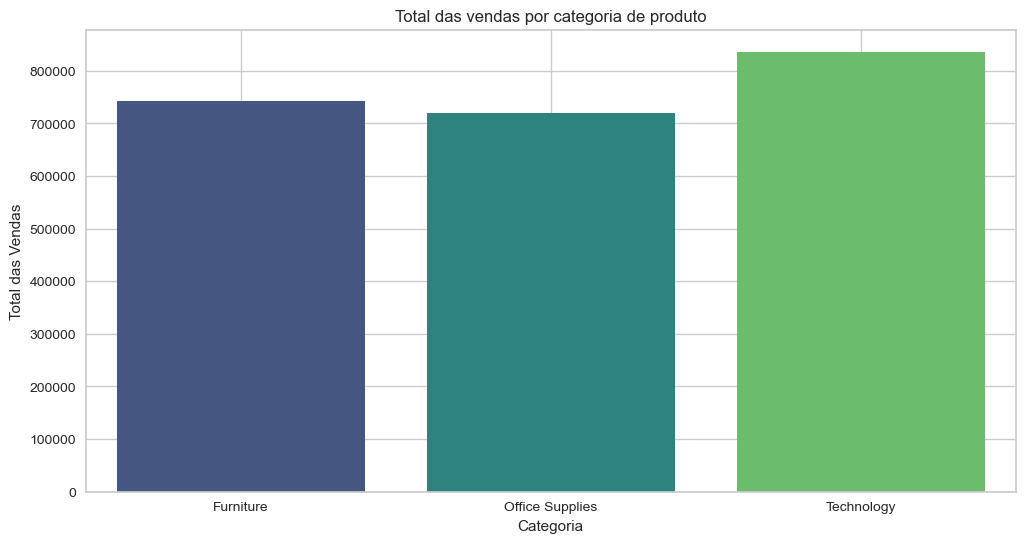

In [155]:
# Gráfico de Vendas por Categoria de produto
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=desempenho_categoria, palette='viridis')
plt.title('Total das vendas por categoria de produto')
plt.xlabel('Categoria')
plt.ylabel('Total das Vendas')
plt.grid(True)
plt.show()

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_3416\3083589884.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




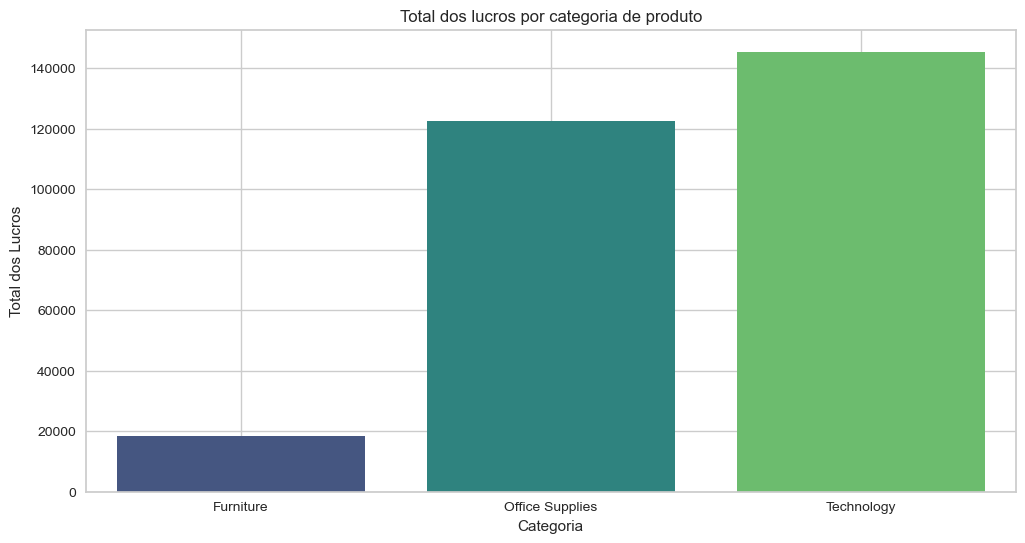

In [156]:
# Gráfico de lucros por categoria de produto
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=desempenho_categoria, palette='viridis')
plt.title('Total dos lucros por categoria de produto')
plt.xlabel('Categoria')
plt.ylabel('Total dos Lucros')
plt.grid(True)
plt.show()

##### Desempenho da subcategoria do produto

In [157]:
# Agrupar por subcategoria e agregar vendas e lucros
desempenho_subcategoria = df.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_3416\2640348093.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




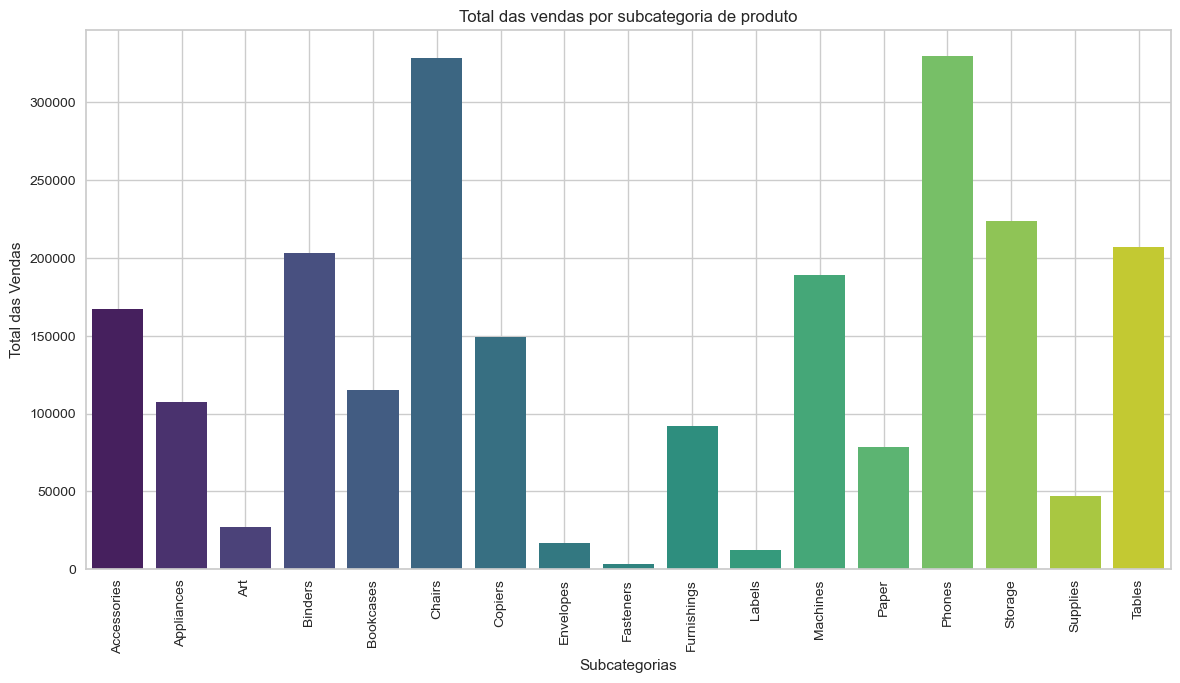

In [158]:
# Gráfico de Vendas por Categoria de produto
plt.figure(figsize=(14, 7))
sns.barplot(x='Sub-Category', y='Sales', data=desempenho_subcategoria, palette='viridis')
plt.title('Total das vendas por subcategoria de produto')
plt.xlabel('Subcategorias')
plt.ylabel('Total das Vendas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_3416\2446506265.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




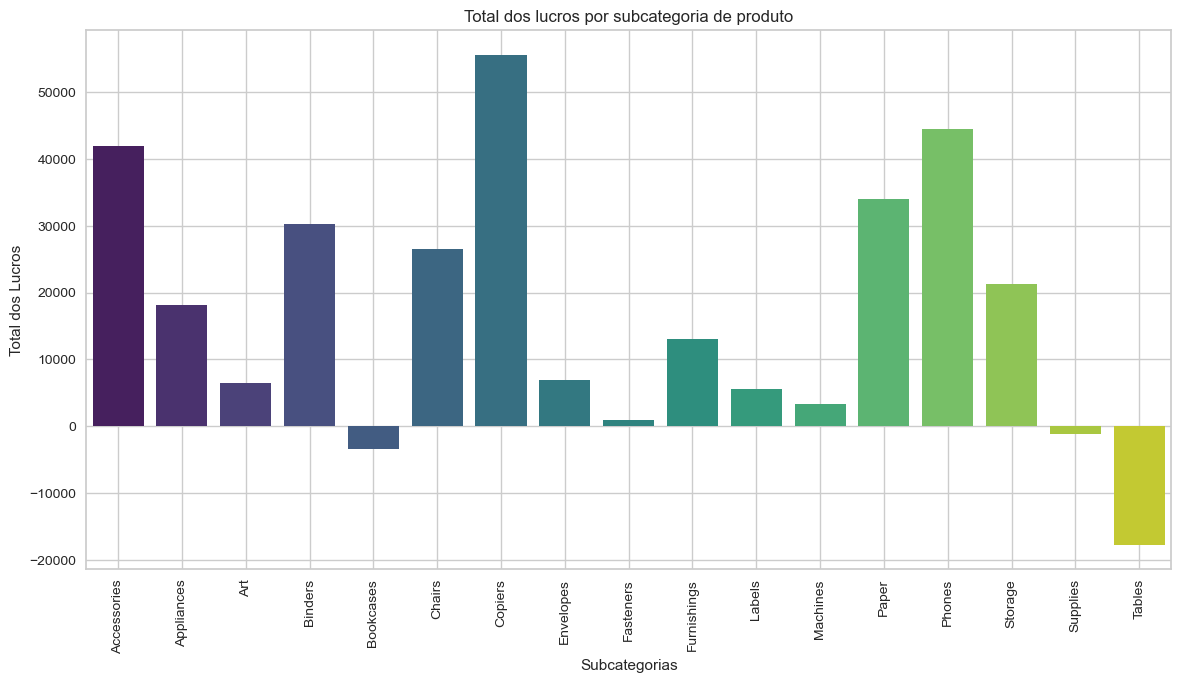

In [159]:
# Gráfico de lucros por categoria de produto
plt.figure(figsize=(14, 7))
sns.barplot(x='Sub-Category', y='Profit', data=desempenho_subcategoria, palette='viridis')
plt.title('Total dos lucros por subcategoria de produto')
plt.xlabel('Subcategorias')
plt.ylabel('Total dos Lucros')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

##### Correlação

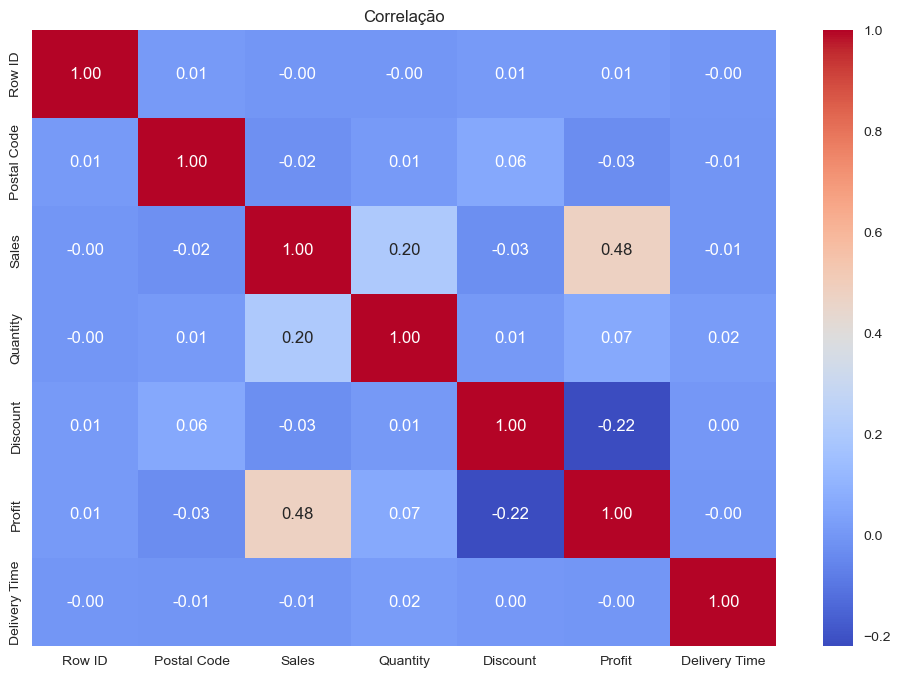

In [160]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação')
plt.show()

### Modelagem Preditiva

#### Construindo um modelo de regressão linear simples para prever o lucro.

In [161]:
# Selecionando recursos e variável de destino
features = ['Sales', 'Quantity', 'Discount']
X = df[features]
y = df['Profit']

In [162]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
# Inicializando e treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [164]:
# Fazendo previsões
y_pred = model.predict(X_test)

In [165]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(83592.67395643325, -0.7240890405096128)

###### Neste notebook, exploramos o conjunto de dados da Superstore, realizamos alguns EDA básicos e construímos um modelo de regressão linear simples para prever o lucro. O desempenho do modelo pode ser melhorado incorporando mais recursos e usando técnicas avançadas de modelagem.

### Clustering

##### Obtendo as 'datas' mínimas e máximas no conjunto de dados.

In [166]:
# Convertendo as colunas 'Order Date' e 'Ship Date' em formato de data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [167]:
# Calculando o tempo de entrega 'Delivery Time'
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [168]:
min_date = min(df['Order Date'])
max_date = max(df['Order Date'])

min_date, max_date

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

##### Definindo para cada cliente a data da última compra e a atualidade do cliente

In [169]:
df['Last Purchase Date'] = df.groupby('Customer ID')['Order Date'].transform(max)
df['Last Purchase Date'] = pd.to_datetime(df['Last Purchase Date']) 

df["Customer Recency"] = (df["Order Date"] - df["Last Purchase Date"]).dt.days

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_3416\2295898529.py:1: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



In [170]:
features = customer_data.columns.to_list()

features.remove('City')

print(features)

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Last Purchase Date', 'Delivery Time', 'Customer Recency']


In [171]:
df.groupby('Segment')['Sales'].mean().reset_index()

,Segment,Sales
0,Consumer,223.733644
1,Corporate,233.823300
2,Home Office,240.972041


In [172]:
df.groupby('Segment')['Profit'].mean().reset_index()

,Segment,Profit
0,Consumer,25.836873
1,Corporate,30.456667
2,Home Office,33.818664


In [173]:
city_data = df[features + ['City']]

city_grouped = (city_data.groupby('City',as_index=False)
        .agg({'Sales':'mean',
              'Quantity':'mean',
              'Discount':'mean',
              'Profit':'mean',
              'Segment':lambda x: x.mode().max(),
              'Ship Mode':lambda x: x.mode().max(),
              'Region':lambda x: x.mode().max(),
              'Category':lambda x: x.mode().max()}))

city_grouped.head()

,City,Sales,Quantity,Discount,Profit,Segment,Ship Mode,Region,Category
0,Aberdeen,25.500000,3.000000,0.000000,6.630000,Consumer,Second Class,Central,Office Supplies
1,Abilene,1.392000,2.000000,0.800000,-3.758400,Consumer,First Class,Central,Office Supplies
2,Akron,129.999333,3.095238,0.357143,-8.887410,Consumer,Standard Class,East,Office Supplies
3,Albuquerque,158.582857,4.642857,0.057143,45.292007,Home Office,Second Class,West,Office Supplies
4,Alexandria,344.973125,5.250000,0.000000,19.913644,Home Office,Standard Class,South,Office Supplies


In [174]:
### Codificação categórica (ordinal) ###
city_grouped2 = city_grouped[['Segment','Sales','Quantity','Discount','Profit']]

# Segmento
encoder = OrdinalEncoder(categories=[['Home Office','Corporate','Consumer']])

city_grouped2['Segment'] = encoder.fit_transform(city_grouped2[['Segment']])

city_grouped2.head()

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_3416\3591538829.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Segment,Sales,Quantity,Discount,Profit
0,2.0,25.500000,3.000000,0.000000,6.630000
1,2.0,1.392000,2.000000,0.800000,-3.758400
2,2.0,129.999333,3.095238,0.357143,-8.887410
3,0.0,158.582857,4.642857,0.057143,45.292007
4,0.0,344.973125,5.250000,0.000000,19.913644


In [175]:
### Dimensionamento ###

mm_scaler = MinMaxScaler() 

LABELS = city_grouped2.columns

# Aplicando Dimensionamento Min-Max 
city_grouped2[LABELS] = mm_scaler.fit_transform(city_grouped2[LABELS])

city_grouped2.head()

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_3416\1378117743.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Segment,Sales,Quantity,Discount,Profit
0,1.0,0.010246,0.200000,0.000000,0.245700
1,1.0,0.000000,0.100000,1.000000,0.233384
2,1.0,0.054657,0.209524,0.446429,0.227304
3,0.0,0.066804,0.364286,0.071429,0.291535
4,0.0,0.146018,0.425000,0.000000,0.261448


In [176]:
inertia = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    # k-means++ é um algoritmo para escolher os valores iniciais para o algoritmo de agrupamento k-means.
    kmeans.fit(city_grouped2)
    inertia.append(kmeans.inertia_)

c:\Users\Rodrigo\anaconda3\envs\git\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\Rodrigo\anaconda3\envs\git\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\Rodrigo\anaconda3\envs\git\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\Rodrigo\anaconda3\envs\git\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Window

c:\Users\Rodrigo\anaconda3\envs\git\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\Rodrigo\anaconda3\envs\git\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\Rodrigo\anaconda3\envs\git\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\Rodrigo\anaconda3\envs\git\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Window

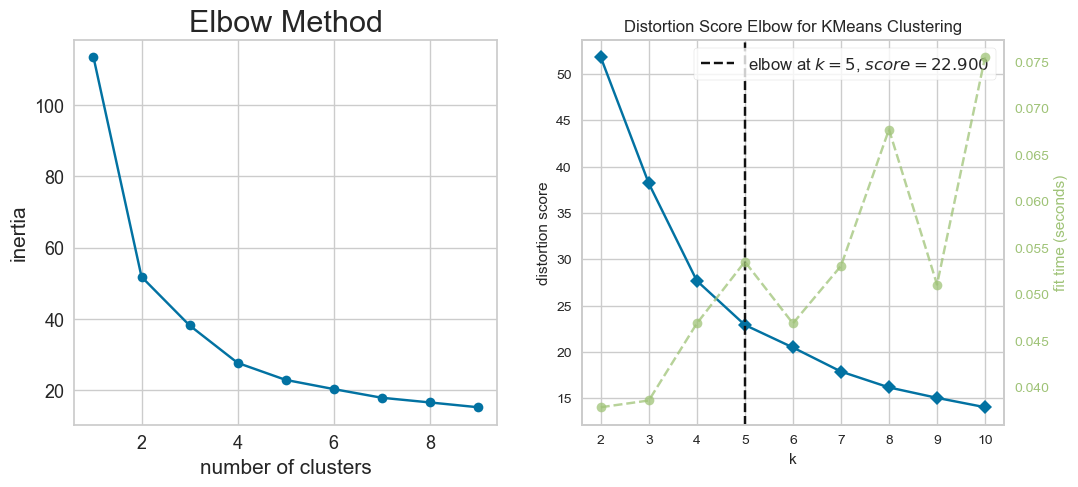

<Figure size 800x550 with 0 Axes>

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Primeiro Gráfico
ax1.plot(range(1,10),inertia,marker='o',linestyle='-')
ax1.xaxis.set_tick_params(labelsize=13)
ax1.yaxis.set_tick_params(labelsize=13)
ax1.set_xlabel("number of clusters",fontsize=15)
ax1.set_ylabel('inertia',fontsize=15)
ax1.set_title("Elbow Method",fontsize=22)

# Segundo Gráfico
Elbow_M = KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(city_grouped2[LABELS])
ax2 = Elbow_M.show()

plt.tight_layout() 

##### Observações finais 
##### As vendas e o lucro cresceram quase constantemente nos anos 2014-2017. A relação vendas/lucro aumentou entre 2014 e 2015, mas depois permaneceu bastante estável. Portanto, para aumentar ainda mais o lucro, a empresa deve aumentar as vendas ou a taxa de lucro, cortando despesas desnecessárias.
##### Existem quatro classes de envio: Mesmo Dia, Primeira Classe, Segunda Classe e Classe Padrão.
##### A distribuição de entrega da turma Same Day tem um pico alto e também bem menor. As distribuições de entrega das outras 3 classes de remessa têm vários picos e também são altamente distribuídas no tempo. A data de entrega é bastante ‘aleatória’.
##### Seria muito importante padronizar as entregas dos fretes para prestar um melhor serviço.
##### Tecnologia e material de escritório são categorias bastante lucrativas; móveis são muito menos. Além disso, existem subcategorias de produtos (como as mesas) que geram lucros negativos.
##### Algo deve ser feito. Talvez alguns produtos devam ser removidos do catálogo ou os descontos sobre eles devam ser bastante reduzidos.
##### Os clientes podem ser agrupados em três categorias de gastos (ou melhor lucro). Os clientes de maior valor devem ser mantidos a qualquer custo, enquanto algo deve ser feito para que os clientes de menor valor ascendam a classes mais lucrativas.

#### Infelizmente não consegui fazer a integração com IA Generativa das estatísticas ao contexto de um LLM para gerar insights em linguagem natural